In [104]:
import numpy as np
from matplotlib.pylab import *
from numpy import random
from collections import OrderedDict
import pdb

In [105]:
def figsize(width,height):
    rcParams['figure.figsize'] = (width,height)

In [106]:
#%matplotlib notebook
%matplotlib inline

font = {'size'   : 22}
matplotlib.rc('font', **font)

figsize(8, 5)

In [95]:
def plot_perf_dim_90(dat, logx=False, saveas=None, d_Int=None):
    plotfn = semilogx if logx else plot
    figsize(10, 5)
    plt.rc('text', usetex=True)

    dir_perf = np.mean(dat[dat[:,0]==-1,:],0)[1]
    sub_perf = dat[dat[:,0]!=-1,:]
    
    if d_Int!=None:
        dir_perf = d_Int
    
    print 'dir_perf: '+ str(dir_perf)
    
    unique_dim = sorted(list(set(sub_perf[:,0])))
    perf_mean = [np.mean(dat[dat[:,0]==d,:],0)[1] for d in unique_dim]

    axhline(dir_perf, color=(0.0,0.0,0.0), ls='-', label='baseline')
    axhline(.75, color=(0.0,0.0,0.0), ls='--', label='90\% accuracy')
    plotfn(unique_dim, perf_mean, '-', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)    
    plotfn(sub_perf[:,0], sub_perf[:,1], 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)

    for i in range(len(unique_dim)):
        if perf_mean[i]>.75:
            print "d_int="+str(unique_dim[i]) + ", acc=" +str( perf_mean[i] ) 
            # plotfn(unique_dim[i], perf_mean[i], 'o', mec='b', lw=3, mfc='b', ms=14)
            break

    xlabel('Subspace dim $d$')
    ylabel('Validation accuracy')
    tight_layout()
    legend(loc=4)
    if saveas:
        savefig('%s.png' % saveas)
        savefig('%s.pdf' % saveas)



In [72]:
def plot_sub_dim_we(dat_swem, dat_cnn, perf_b=1.0, logx=True, xmin=None,ymin=None, saveas=None):
    
    plotfn = semilogx if logx else plot
    leg = OrderedDict()
    
    def sub_dim(dat):
        dir_perf = np.mean(dat[dat[:,0]==-1,:],0)[1]
        sub_perf = dat[dat[:,0]!=-1,:]
        unique_dim = sorted(list(set(sub_perf[:,0])))
        sub_perf = sub_perf[:,1]
        return dir_perf, sub_perf, unique_dim
    
    dir_perf, sub_perf, unique_dim = sub_dim(dat_swem)
    hhd_swem = axhline(dir_perf, color='b', ls='--')
    hh, = plotfn(unique_dim, sub_perf, 'o-', color='b',  mfc=(.7,.7,1), ms=14)
    leg[hh] = 'SWEM'
    
    dir_perf, sub_perf, unique_dim = sub_dim(dat_cnn)
    hhd_cnn = axhline(dir_perf, color='r', ls='--')
    hh, = plotfn(unique_dim, sub_perf, 'o-', color='r', mfc=(1,.7,.7), ms=14)
    leg[hh] = 'CNN'    

    leg[hhd_swem] = 'SWEM direct'
    leg[hhd_cnn] = 'CNN direct'

    tight_layout()
    xlabel('Subspace dim d')
    ylabel('Accuracy')
    ax = axis()
    axis([xmin, ax[1], ymin, ax[3]])
    legend(leg.keys(), leg.values())
    #legend?
    
    plt.tight_layout()
    if saveas:
        savefig('%s.png' % saveas)
        savefig('%s.pdf' % saveas)  

# Text Classification

In [132]:
swem_testing_agnew_we = array([
[-1, 0.9167],[0, 0.9120],[1, 0.9176],[2, 0.9180],[5, 0.9182],[10, 0.9192]
])

swem_training_agnew_we = array([
[-1, 1.0000],[0, 0.9831],[1, 0.9844],[2, 0.9844],[5, 0.9849],[10, 1.0000]
])

cnn_testing_agnew_we = array([
[-1, 0.9166],[0, 0.8796],[1, 0.9118],[2, 0.9063],[5, 0.9053],[10, 0.9088]
])

cnn_training_agnew_we = array([
[-1, 1.0000],[0, 0.9155],[1,  0.9922],[2, 1.0000],[5, 1.0000],[10, 1.0000]
])


swem_testing_agnews = array([
[-1, 0.9167],[10, 0.4197],[100, 0.6818],[200, 0.7661],[500, 0.8220],[1000, 0.8512]#,[2500,0.8633],[5000,0.8712]
])

swem_training_agnews = array([
[-1, 0.9844],[10, 0.4219],[100, 0.6847],[200, 0.7718],[500, 0.8253],[1000, 0.8541],[2500,0.8688],[5000,0.8732]
])

cnn_testing_agnews = array([
[-1, 0.9157],[10, 0.2972],[100, 0.6026],[200, 0.7113],[500, 0.8046],[1000, 0.8487]#,[2500,0.8779],[5000,0.8900]
])

cnn_training_agnews = array([
[-1, 1.0000],[10, 0.2812],[100, 0.6016],[200, 0.7141],[500, 0.8083],[1000, 0.8506],[2500,0.8837],[5000,0.9013]
])

swem_testing_yelp = array([
[-1, 0.9319],[10, 0.5757],[50, 0.6583],[100,0.7033],[200, 0.7482],[500, 0.7732],[1000, 0.7846]#,[5000, 0.7927],[10000, 0.8005],[20000, 0.7987]
])

swem_training_yelp = array([
[-1, 0.9688],[10, 0.5938],[50,0.6598],[100,0.7056],[200, 0.7461],[500, 0.7738],[1000, 0.7828],[5000, 0.7885],[10000, 0.7973],[20000, 0.8011]
])

cnn_testing_yelp = array([
[-1, 0.9384],[10, 0.5238],[50, 0.6199],[100, 0.6663],[200, 0.7114],[500, 0.7853],[1000, 0.8331]# ,[5000, 0.8976],[10000,0.9147],[20000,0.9254]
])

cnn_training_yelp = array([
[-1, 0.9727],[10,  0.5311],[50, 0.6196],[100, 0.6685],[200,  0.7131],[500,  0.7850],[1000, 0.8306],[5000, 0.9024],[10000,0.9208],[20000,0.9347]
])

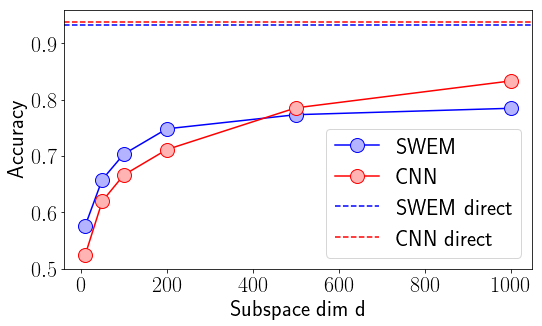

In [130]:
plot_sub_dim_we(swem_testing_yelp, cnn_testing_yelp, logx=False, ymin=0.5, saveas='testing_yelp_we')

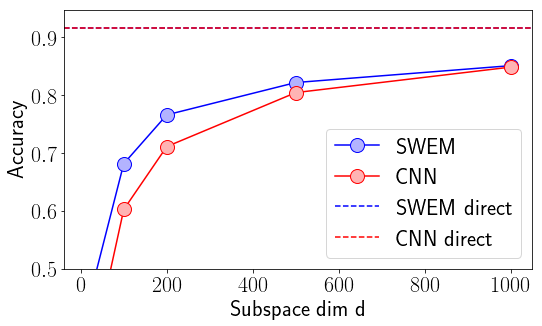

In [133]:
plot_sub_dim_we(swem_testing_agnews, cnn_testing_agnews, logx=False, ymin=0.5, saveas='testing_agnews_we')

dir_perf: 0.9166
d_int=1.0, acc=0.9118


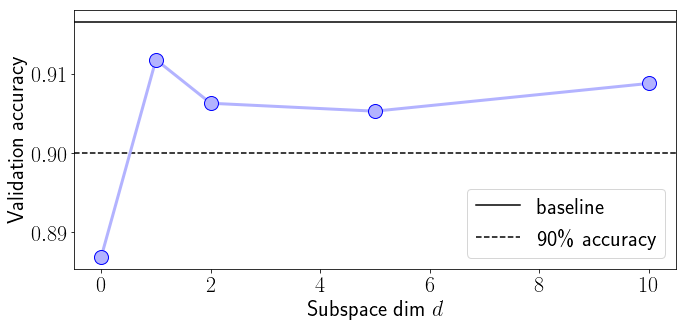

In [50]:
plot_perf_dim_90(cnn_testing_agnew, logx=False, saveas='cnn_testing_agnew', d_Int=None)

dir_perf: 1.0
d_int=0.0, acc=0.9235


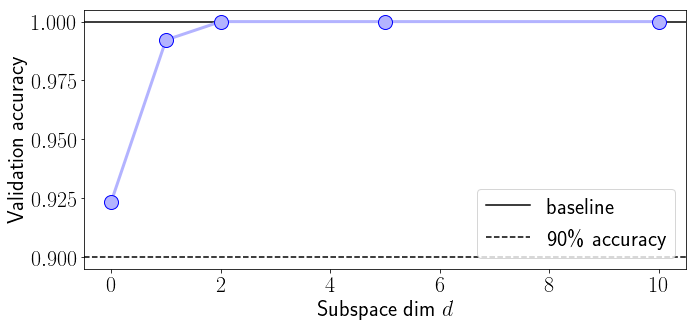

In [49]:
plot_perf_dim_90(cnn_training_agnew, logx=False, saveas='cnn_training_agnew', d_Int=None)

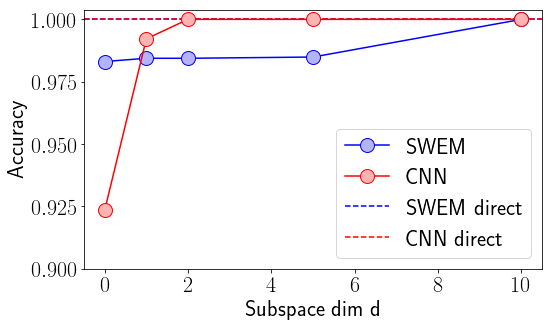

In [90]:
plot_sub_dim_we(swem_training_agnew, cnn_training_agnew, logx=False, ymin=0.9, saveas='training_agnew')

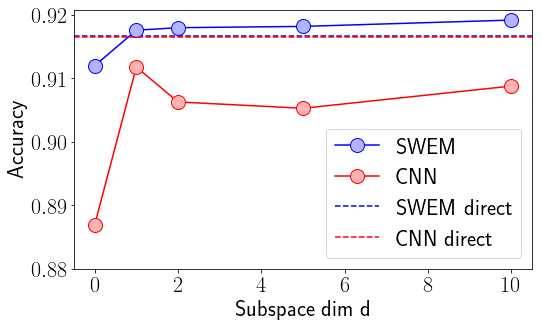

In [91]:
plot_sub_dim_we(swem_testing_agnew, cnn_testing_agnew, logx=False, ymin=0.88, saveas='testing_agnew')